# Evaluation

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import postbound as pb
import seaborn as sns

sns.set_theme(
    context="talk",
    style="white",
    palette=["#019ba4", "#bccf02", "#83cfec", "#28608b"],
    rc={"figure.figsize": (8, 6), "pdf.fonttype": 42, "ps.fonttype": 42},
)

In [2]:
workload = pb.workloads.stats()
workload

Workload: Stats (146 queries)

In [3]:
df_native = pd.read_csv("benchmark-native.csv").assign(
    model="native",
    label=lambda x: pd.Categorical(x["label"], workload.labels(), ordered=True),
)

df_mscnl = pd.read_csv("benchmark-mscn-light.csv").assign(
    model="mscn-light",
    label=lambda x: pd.Categorical(x["label"], workload.labels(), ordered=True),
)

df_baol = pd.read_csv("benchmark-bao-light.csv").assign(
    model="bao-light",
    label=lambda x: pd.Categorical(x["label"], workload.labels(), ordered=True),
)

df_pessimistic = pd.read_csv("benchmark-pessimistic.csv").assign(
    model="pessimistic",
    label=lambda x: pd.Categorical(x["label"], workload.labels(), ordered=True),
)

df_complete = pd.concat(
    [df_native, df_mscnl, df_baol, df_pessimistic], ignore_index=True
)
df_complete

,execution_index,label,query,workload_iteration,query_repetition,exec_time,query_result,model,optimization_time,optimization_success,optimization_failure_reason,original_query,optimization_settings,db_config
0,1,q-1,"SELECT COUNT(*) FROM badges AS b, users AS u W...",1,1,0.034651,"[{""Plan"": {""Node Type"": ""Aggregate"", ""Strategy...",native,NaN,NaN,NaN,NaN,NaN,NaN
1,2,q-2,"SELECT COUNT(*) FROM comments AS c, badges AS ...",1,1,0.446625,"[{""Plan"": {""Node Type"": ""Aggregate"", ""Strategy...",native,NaN,NaN,NaN,NaN,NaN,NaN
2,3,q-3,"SELECT COUNT(*) FROM comments AS c, posthistor...",1,1,0.193877,"[{""Plan"": {""Node Type"": ""Aggregate"", ""Strategy...",native,NaN,NaN,NaN,NaN,NaN,NaN
3,4,q-4,"SELECT COUNT(*) FROM comments AS c, posthistor...",1,1,0.172534,"[{""Plan"": {""Node Type"": ""Aggregate"", ""Strategy...",native,NaN,NaN,NaN,NaN,NaN,NaN
4,5,q-5,"SELECT COUNT(*) FROM comments AS c, votes AS v...",1,1,0.346486,"[{""Plan"": {""Node Type"": ""Aggregate"", ""Strategy...",native,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,142,q-142,"SELECT COUNT(*) FROM comments AS c, posts AS p...",1,1,22.247242,"[{""Plan"": {""Node Type"": ""Aggregate"", ""Strategy...",pessimistic,0.018367,True,NaN,"SELECT COUNT(*) FROM comments AS c, posts AS p...","{""name"": ""two_stage_pipeline"", ""database_syste...","{""system_name"": ""postgres"", ""system_version"": ..."
580,143,q-143,"SELECT COUNT(*) FROM comments AS c, posts AS p...",1,1,16.070976,"[{""Plan"": {""Node Type"": ""Aggregate"", ""Strategy...",pessimistic,0.025752,True,NaN,"SELECT COUNT(*) FROM comments AS c, posts AS p...","{""name"": ""two_stage_pipeline"", ""database_syste...","{""system_name"": ""postgres"", ""system_version"": ..."
581,144,q-144,"SELECT COUNT(*) FROM comments AS c, posts AS p...",1,1,1.234939,"[{""Plan"": {""Node Type"": ""Aggregate"", ""Strategy...",pessimistic,0.015884,True,NaN,"SELECT COUNT(*) FROM comments AS c, posts AS p...","{""name"": ""two_stage_pipeline"", ""database_syste...","{""system_name"": ""postgres"", ""system_version"": ..."
582,145,q-145,"SELECT COUNT(*) FROM comments AS c, posts AS p...",1,1,0.192883,"[{""Plan"": {""Node Type"": ""Aggregate"", ""Strategy...",pessimistic,0.016261,True,NaN,"SELECT COUNT(*) FROM comments AS c, posts AS p...","{""name"": ""two_stage_pipeline"", ""database_syste...","{""system_name"": ""postgres"", ""system_version"": ..."


<Axes: xlabel='label', ylabel='exec_time'>

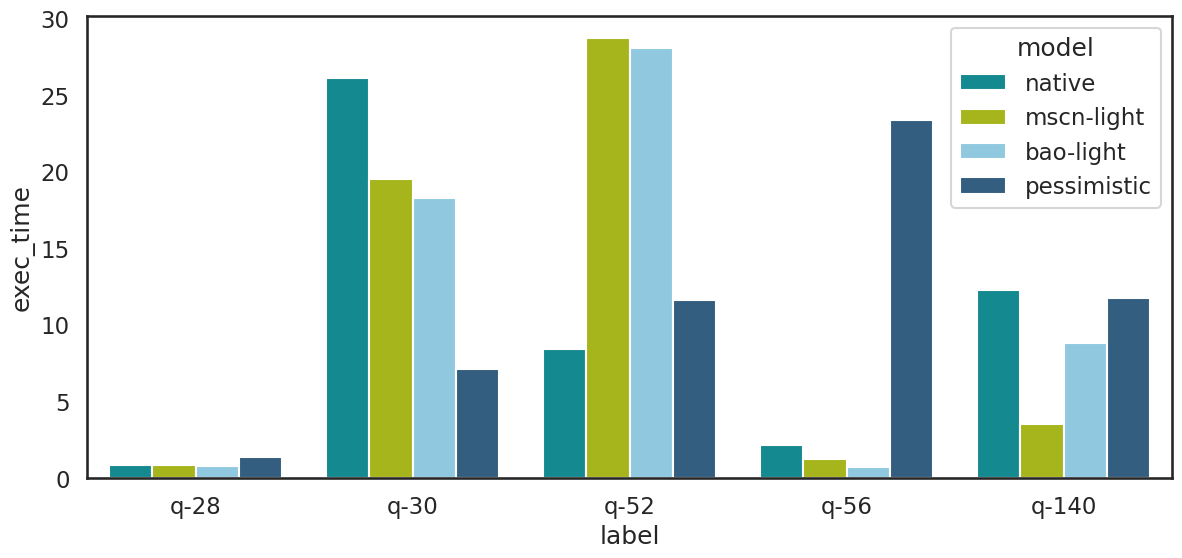

In [4]:
fig, ax = plt.subplots(figsize=(14, 6))
interesting_labels = {"q-28", "q-30", "q-52", "q-56", "q-140"}
sns.barplot(
    df_complete.query("label in @interesting_labels").assign(
        label=lambda x: x["label"].cat.remove_unused_categories()
    ),
    x="label",
    y="exec_time",
    hue="model",
    orient="v",
)